# Entregable 3: Respuestas - Preguntas Datos Blind Test

## Lectura de archivo: Producción de Crudo de 2018 a 2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Leer archivo .xlsx con datos de produccion: 2017 a 2019 (Archivo de salida del entregable 1: archivo lectura de datos)
df_2017_2019_blind = pd.read_excel('Datos_salida/Produccion_Fiscalizada_Crudo_Blind_2017-2019.xlsx')

In [2]:
# produccion de 2017 a 2019
df_2017_2019_blind.head(10)

,departamento,municipio,operadora,contrato,campo,año,mes,produccion
0,cf33cb8a,cf33cb8a,d5580f74,1f d2689f,1f d2689f,2019,ene,7897.993261
1,cf33cb8a,cf33cb8a,d5580f74,1f d2689f,9ac1420f,2019,ene,134.214677
2,cf33cb8a,cf33cb8a,d5580f74,1f d2689f,9b395bc9,2019,ene,322.628507
3,cf33cb8a,cf33cb8a,d5580f74,1f d2689f,254d7db5,2019,ene,40.170881
4,cf33cb8a,cf33cb8a,d5580f74,29ded6f4,2f614c0b,2019,ene,22890.888398
5,cf33cb8a,cf33cb8a,d5580f74,29ded6f4,043b305e,2019,ene,3514.332254
6,cf33cb8a,cf33cb8a,d5580f74,29ded6f4,fca93f9e,2019,ene,26.349227
7,cf33cb8a,102a28a6,d5580f74,1f d2689f,13276557,2019,ene,205.780613
8,cf33cb8a,102a28a6,d5580f74,1f d2689f,c220f014,2019,ene,1252.898684
9,cf33cb8a,102a28a6,d5580f74,1f d2689f,1fd2689f,2019,ene,128.385875


## Pregunta 6

In [3]:
# ** Caudal de produccion del Campo "1F D2689F" por mes (2019) **

query6 = df_2017_2019_blind.loc[(df_2017_2019_blind['año'] == 2019)].groupby(['campo','mes'],as_index = False).sum() # Produccion en 2019 (todos los campos)
query6 = query6[query6['campo'].isin(['1f d2689f','1fd2689f','1f-d2689f'])].groupby(['mes','año'],as_index = False).sum() # Produccion en 2019 (campo "1F D2689F")

# ordenar por meses
meses_orden ={'ene':31,'feb':28,'mar':31,'abr':30,'may':31,'jun':30,'jul':31,'ago':31,'sep':30,'oct':31,'nov':30,'dic':31}
query6['mes'] = pd.Categorical(query6['mes'], meses_orden.keys())
query6.sort_values('mes',inplace = True)
query6.reset_index(drop = True, inplace = True)

query6['dias'] = query6['mes'].map(meses_orden) # anadir columna con numero de dias por mes
query6['caudal'] = query6['produccion']/query6['dias'] #Calcular Caudal por mes

print('Caudal de produccion del Campo "1F D2689F" por mes (2019):')
query6

Caudal de produccion del Campo "1F D2689F" por mes (2019):


,mes,año,produccion,dias,caudal
0,ene,2019,8026.379137,31,258.915456
1,feb,2019,6834.356628,28,244.084165
2,mar,2019,6324.793241,31,204.025588
3,abr,2019,6116.217848,30,203.873928
4,may,2019,5935.231390,31,191.459077
5,jun,2019,6487.956181,30,216.265206
6,jul,2019,4819.418285,31,155.465106
7,ago,2019,5958.176858,31,192.199253
8,sep,2019,5255.556174,30,175.185206
9,oct,2019,6024.164109,31,194.327874


In [4]:
# Produccion en Julio de 2019
Q_produccion = query6.loc[query6['mes'] == 'jul']['caudal'].values[0]
print('\nCauldal de produccion del Campo "1F D2689F" (Julio 2019):',round(Q_produccion,2),'[bppd]\n')


Cauldal de produccion del Campo "1F D2689F" (Julio 2019): 155.47 [bppd]



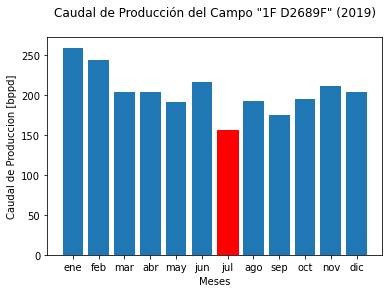

In [5]:
# Grafica - Pregunta 6:

## Grafica de barras: Caudal del campo "1F D2689F" por mes en 2019
bar_list = plt.bar(query6['mes'].values,query6['caudal'].values) 
bar_list[6].set_color('r')
plt.xticks(query6['mes'].values,fontsize = 10)
plt.xlabel('Meses')
plt.ylabel('Caudal de Produccion [bppd]')
plt.title('Caudal de Producción del Campo "1F D2689F" (2019)\n')
plt.show()

## Pregunta 7

In [6]:
# *** Barriles Producidos por la Operadora "2FE52430" por mes (2019) ***

query7 = df_2017_2019_blind.loc[(df_2017_2019_blind['año'] == 2019)].groupby(['operadora','mes','año'],as_index = False).sum() # Produccion en 2019 (todos las operadoras)
query7 = query7[query7['operadora'].isin(['2fe52430'])].groupby(['mes','año'],as_index = False).sum() # Produccion en 2019 (operadora "2FE52430")

# ordenar por meses
meses_orden ={'ene':31,'feb':28,'mar':31,'abr':30,'may':31,'jun':30,'jul':31,'ago':31,'sep':30,'oct':31,'nov':30,'dic':31}
query7['mes'] = pd.Categorical(query7['mes'], meses_orden.keys())
query7.sort_values('mes',inplace = True)
query7.reset_index(drop = True, inplace = True)

print('Barriles Producidos por la Operadora "2FE52430" por mes (2019):')
query7

Barriles Producidos por la Operadora "2FE52430" por mes (2019):


,mes,año,produccion
0,ene,2019,7585.195419
1,feb,2019,7452.220450
2,mar,2019,7694.006962
3,abr,2019,7661.948554
4,may,2019,7832.321374
5,jun,2019,5272.020363
6,jul,2019,7913.272115
7,ago,2019,6966.255009
8,sep,2019,7302.313683
9,oct,2019,7987.806826


In [7]:
# Produccion en Febrero de 2019
Barriles_produccion = query7.loc[query7['mes'] == 'feb']['produccion'].values[0]
print('\nBarriles Producidos por la Operadora "2FE52430" (Febrero 2019):',round(Barriles_produccion,2),'[barriles]\n')


Barriles Producidos por la Operadora "2FE52430" (Febrero 2019): 7452.22 [barriles]



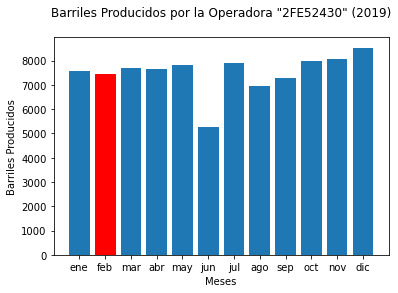

In [8]:
# Grafica - Pregunta 7:

# Grafica de barras: Produccion de la Operadora "2FE52430" en 2019
bar_list = plt.bar(query7['mes'].values,query7['produccion'].values)
bar_list[1].set_color('r')
plt.xticks(query7['mes'].values,fontsize = 10)
plt.xlabel('Meses')
plt.ylabel('Barriles Producidos')
plt.title('Barriles Producidos por la Operadora "2FE52430" (2019)\n')
plt.show()

## Pregunta 8

In [9]:
# Produccion por Departamento en 2018
query8 = df_2017_2019_blind.loc[(df_2017_2019_blind['año'] == 2018)].groupby(['departamento','año'],as_index = False).sum() 
query8

,departamento,año,produccion
0,0fa93c9b,2018,98767.669386
1,cf33cb8a,2018,623608.432526
2,f7fd2c4f,2018,126069.165338


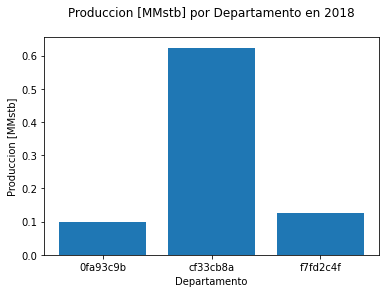

In [10]:
## ** Grafica - Pregunta 8 ***

# Grafica de Barras: Produccion por Departamento en 2018
plt.bar(query8['departamento'].values,query8['produccion'].values/1e6)
plt.xlabel('Departamento')
plt.ylabel('Produccion [MMstb]')
plt.title('Produccion [MMstb] por Departamento en 2018\n')
plt.show()

## Pregunta 9

### Año 2019

In [11]:
## *** Produccion por Departamento (año 2019) ***

# Calcular indicadores estadisticos (mean, std, min, max) para cada campo en cada departamento (2019)
query9_19 = df_2017_2019_blind.loc[df_2017_2019_blind['año'] == 2019].drop('año',axis = 1).groupby(['departamento','campo']).describe() 

# Ordenar produccion en funcion de la desviacion estandar (std: medida de la variabilidad de la produccion)
# Para cada departamento, y para cada uno de los campos dentro de cada departamento
query9_19 = query9_19.sort_values(['departamento',('produccion','std')],ascending = [True,False])

# Imprimir: Datos de Produccion ordenados en funcion de 'STD'
produccion2019_departamento_ordenado = query9_19.drop([('produccion','count'),('produccion','25%'),('produccion','50%'),('produccion','75%')], axis = 1) # eliminar columnas de percentiles
print(produccion2019_departamento_ordenado)

                          produccion                                         
                                mean           std          min           max
departamento campo                                                           
0fa93c9b     48670499    5611.136620    714.439959  3690.816615   6564.687567
             373ebdec     874.141684    241.704517   382.754333   1128.155810
             e32e23a1     479.041021     59.328606   361.396561    567.285920
657b6154     8568d01e     199.791411    205.573009     0.000000    609.261990
             11e586b4      95.076659    178.196136     0.000000    548.668555
cf33cb8a     2f614c0b   12458.858168  12042.715975   150.635367  25999.977584
             5559f8d7    4272.447078   1326.999765  2458.231739   6059.658900
             fd6f6562    3378.712031   1194.101786   869.763739   4814.220212
             febb6cf6    4149.936221    833.663173  2471.139924   5827.822674
             d56beadb     474.831361    810.840341     0.000000 

In [12]:
#  *** Obtener el Top 5 de Campos con mayor variabilidad para cada Departamento (2019) ***

top = 5 #top 5 

# Obtener nombre de los departamentos
departamentos = np.array(produccion2019_departamento_ordenado.index.get_level_values(0))
departamentos = np.unique(departamentos)
print('Nombre de los departamentos (2019): ',departamentos, '\n')
print('Numero de departamentos con produccion en 2019: ',len(departamentos), '\n')

# Obtener Produccion Promedio y Desv. Estandar 
## Inicializar dos matrices: para almacenar promedios y desviaciones para el top 5 de campos en cada departamento 
dep_std_values = np.zeros((len(departamentos),top))
dep_mean_values = np.zeros((len(departamentos),top))
i=0

# Iterar sobre cada departamento en el DataFrame: produccion2019_departamento_ordenado (valores promedio y desv. estandar)
for dep in departamentos:
    mean_values = produccion2019_departamento_ordenado.loc[produccion2019_departamento_ordenado.index.get_level_values('departamento') == dep,('produccion','mean')].values
    std_values = produccion2019_departamento_ordenado.loc[produccion2019_departamento_ordenado.index.get_level_values('departamento') == dep,('produccion','std')].values
    if (len(std_values) >= top): # Tomar el Top 5 de campos para el departamento
        dep_std_values[i,:] = std_values[0:top]
        dep_mean_values[i,:] = mean_values[0:top] 
    else: # rellenar con 0 si el departamento tiene menos de 5 campos 
        dep_std_values[i,:] = np.pad(std_values,(0,top-len(std_values)))
        dep_mean_values[i,:] = np.pad(mean_values,(0,top-len(std_values)))
    i += 1
   

Nombre de los departamentos (2019):  ['0fa93c9b' '657b6154' 'cf33cb8a' 'ec12ad00' 'f7fd2c4f'] 

Numero de departamentos con produccion en 2019:  5 



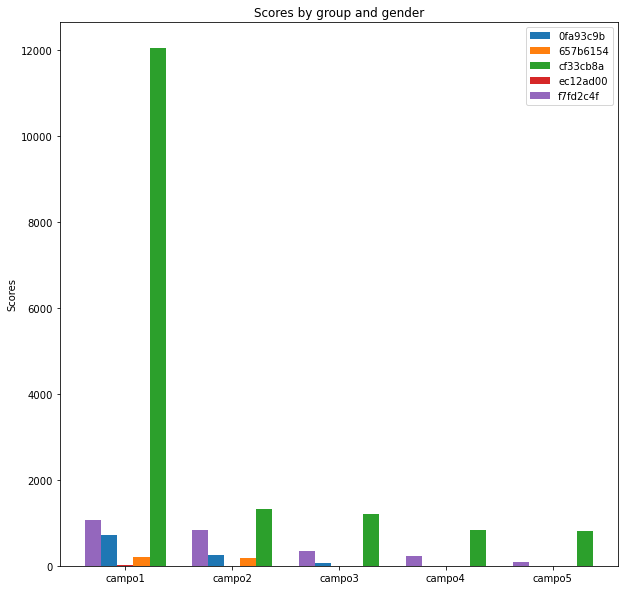

In [13]:
labels = ['campo1', 'campo2', 'campo3','campo4','campo5'] # labels genericos
dep1 = dep_std_values[0,:]
dep2 = dep_std_values[1,:]
dep3 = dep_std_values[2,:]
dep4 = dep_std_values[3,:]
dep5 = dep_std_values[4,:]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize = (10,10))

rects1 = ax.bar(x - width, dep1, width, label= departamentos[0])
rects2 = ax.bar(x + width, dep2, width, label=departamentos[1])
rects3 = ax.bar(x + 2*width, dep3, width, label=departamentos[2])
rects4 = ax.bar(x , dep4, width, label=departamentos[3])
rects5 = ax.bar(x - 2*width, dep5, width, label=departamentos[4])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

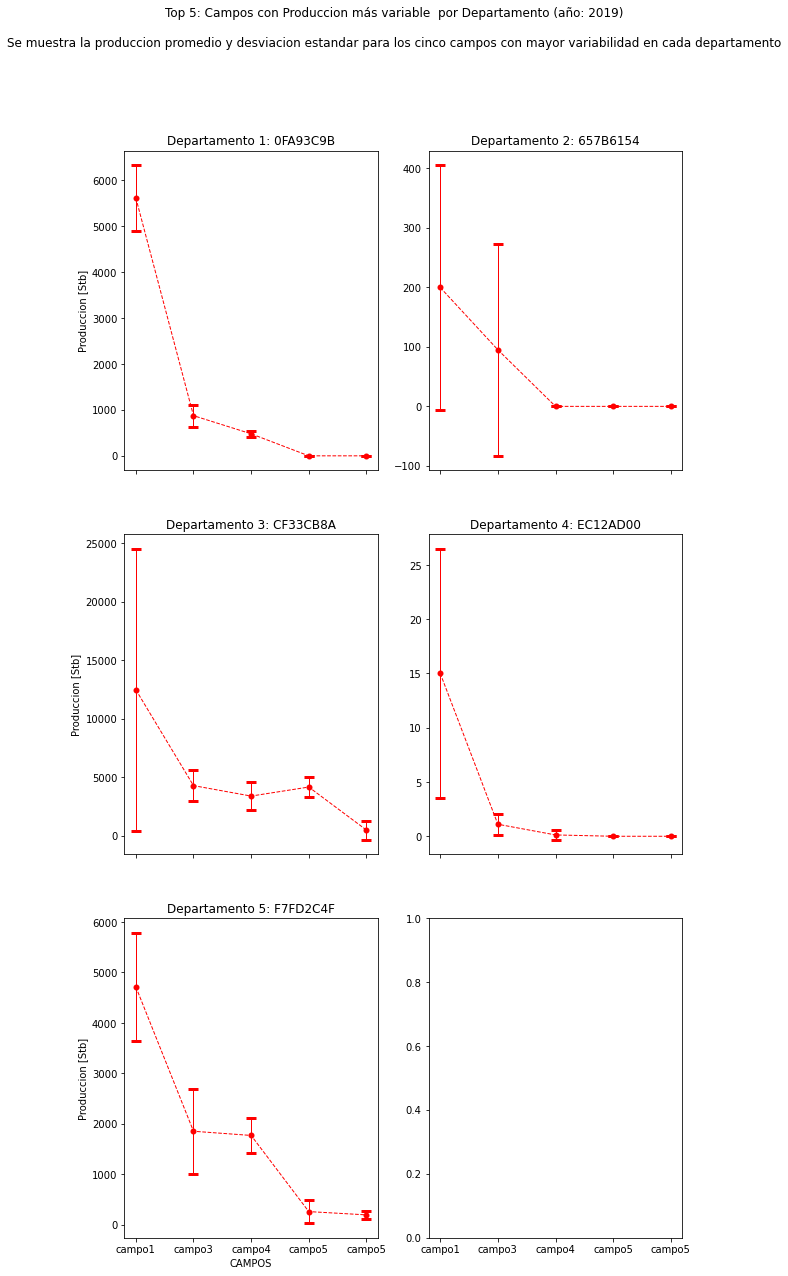

In [14]:
# ** Grafica - Pregunta 9 (2019) **

x = np.array([1, 2, 3, 4, 5])
x_labels = ['campo1','campo3','campo4','campo5','campo5'] # Top5: labels de campos genericos

# Departamento 1
dep1_std = dep_std_values[0,:] # Desv. estandard del Top 5-Campos en el Departamento 1
dep1_mean = dep_mean_values[0,:] # Produccion promedio del Top 5-Campos en el Departamento 1
dep1 = departamentos[0] # Nombre del Departamento 1

# Departamento 2
dep2_std = dep_std_values[1,:] 
dep2_mean = dep_mean_values[1,:]
dep2 = departamentos[1]

# Departamento 3
dep3_std = dep_std_values[2,:] 
dep3_mean = dep_mean_values[2,:]
dep3 = departamentos[2]

# Departamento 4
dep4_std = dep_std_values[3,:] 
dep4_mean = dep_mean_values[3,:]
dep4 = departamentos[3]

# Departamento 5
dep5_std = dep_std_values[4,:] 
dep5_mean = dep_mean_values[4,:]
dep5 = departamentos[4]

## Crear Grafica
fig, axs = plt.subplots(nrows=3, ncols=2, sharex=True,figsize = (10,20))
fig.suptitle('Top 5: Campos con Produccion más variable  por Departamento (año: 2019)\n\nSe muestra la produccion promedio y desviacion estandar para los cinco campos con mayor variabilidad en cada departamento')
plt.setp(axs, xticks = x, xticklabels=x_labels)

# definir tipo de linea
linestyle = {"linestyle":"--", "linewidth":1, "markeredgewidth":3, "elinewidth":1, "capsize":5}

# Departamento 1
axs[0,0].errorbar(x, dep1_mean, dep1_std, color = 'r', marker='.',**linestyle)
axs[0,0].set_title('Departamento 1: '+str(dep1.upper()))
axs[0,0].set_ylabel('Produccion [Stb]')


# Departamento 2
axs[0,1].errorbar(x, dep2_mean, dep2_std, color = 'r', marker='.',**linestyle)
axs[0,1].set_title('Departamento 2: '+str(dep2.upper()))

# Departamento 3
axs[1,0].errorbar(x, dep3_mean, dep3_std, color = 'r', marker='.',**linestyle)
axs[1,0].set_title('Departamento 3: '+str(dep3.upper()))
axs[1,0].set_ylabel('Produccion [Stb]')

# Departamento 4
axs[1,1].errorbar(x, dep4_mean, dep4_std, color = 'r', marker='.',**linestyle)
axs[1,1].set_title('Departamento 4: '+str(dep4.upper()))

# Departamento 5
axs[2,0].errorbar(x, dep5_mean, dep5_std, color = 'r', marker='.',**linestyle)
axs[2,0].set_title('Departamento 5: '+str(dep5.upper()))
axs[2,0].set_ylabel('Produccion [Stb]')
axs[2,0].set_xlabel('CAMPOS')

plt.show()



### Año 2018

In [15]:
## *** Produccion por Departamento (año 2018) ***

# Calcular indicadores estadisticos (mean, std, min, max) para cada campo en cada departamento (2018)
query9_18 = df_2017_2019_blind.loc[df_2017_2019_blind['año'] == 2018].drop('año',axis = 1).groupby(['departamento','campo']).describe() 

# Ordenar produccion en funcion de la desviacion estandar (std: medida de la variabilidad de la produccion)
# Para cada departamento, y para cada uno de los campos dentro de cada departamento
query9_18 = query9_18.sort_values(['departamento',('produccion','std')],ascending = [True,False])

# Imprimir: Datos de Produccion ordenados en funcion de 'STD'
produccion2018_departamento_ordenado = query9_18.drop([('produccion','count'),('produccion','25%'),('produccion','50%'),('produccion','75%')], axis = 1) # eliminar columnas de percentiles
print(produccion2018_departamento_ordenado)


                          produccion                                         
                                mean           std          min           max
departamento campo                                                           
0fa93c9b     48670499    6650.664063    437.903970  5650.958063   7463.355018
             373ebdec     928.525794    171.680447   531.920222   1147.428459
             e32e23a1     651.449259    104.307775   496.172006    804.043091
cf33cb8a     2f614c0b   11491.374146  11683.869359    38.387442  23697.922363
             5559f8d7    2615.105112    976.070438    14.803528   3612.950643
             febb6cf6    3821.033275    556.241225  3062.585646   4491.221967
             124207de     141.902221    491.563714     0.000000   1702.826656
             1f-d2689f   8941.949018    394.811364  8365.185935   9630.066957
             876a64fe     936.737194    368.365395     0.000000   1197.226545
             fd6f6562     218.652818    362.602943     0.000000 

In [16]:
#  *** Obtener el Top 5 de Campos con mayor variabilidad para cada Departamento (2018) ***

top = 5 #top 5 

# Obtener nombre de los departamentos
departamentos = np.array(produccion2018_departamento_ordenado.index.get_level_values(0))
departamentos = np.unique(departamentos)
print('Nombre de los departamentos (2018): ',departamentos, '\n')
print('Numero de departamentos con produccion en 2018: ',len(departamentos), '\n')

# Obtener Produccion Promedio y Desv. Estandar 
## Inicializar dos matrices: para almacenar promedios y desviaciones para el top 5 de campos en cada departamento 
dep_std_values = np.zeros((len(departamentos),top))
dep_mean_values = np.zeros((len(departamentos),top))
i=0

# Iterar sobre cada departamento en el DataFrame: produccion2018_departamento_ordenado (valores promedio y desv. estandar)
for dep in departamentos:
    mean_values = produccion2018_departamento_ordenado.loc[produccion2018_departamento_ordenado.index.get_level_values('departamento') == dep,('produccion','mean')].values
    std_values = produccion2018_departamento_ordenado.loc[produccion2018_departamento_ordenado.index.get_level_values('departamento') == dep,('produccion','std')].values
    if (len(std_values) >= top): # Tomar el Top 5 de campos para el departamento
        dep_std_values[i,:] = std_values[0:top]
        dep_mean_values[i,:] = mean_values[0:top] 
    else: # rellenar con 0 si el departamento tiene menos de 5 campos 
        dep_std_values[i,:] = np.pad(std_values,(0,top-len(std_values)))
        dep_mean_values[i,:] = np.pad(mean_values,(0,top-len(std_values)))
    i += 1
   


Nombre de los departamentos (2018):  ['0fa93c9b' 'cf33cb8a' 'f7fd2c4f'] 

Numero de departamentos con produccion en 2018:  3 



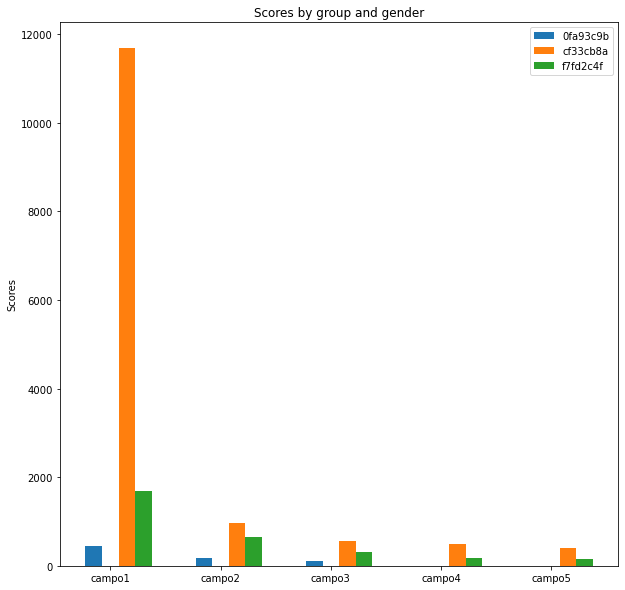

In [17]:
labels = ['campo1', 'campo2', 'campo3','campo4','campo5'] # labels genericos
dep1 = dep_std_values[0,:]
dep2 = dep_std_values[1,:]
dep3 = dep_std_values[2,:]


x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize = (10,10))

rects1 = ax.bar(x - width, dep1, width, label= departamentos[0])
rects2 = ax.bar(x + width, dep2, width, label=departamentos[1])
rects3 = ax.bar(x + 2*width, dep3, width, label=departamentos[2])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

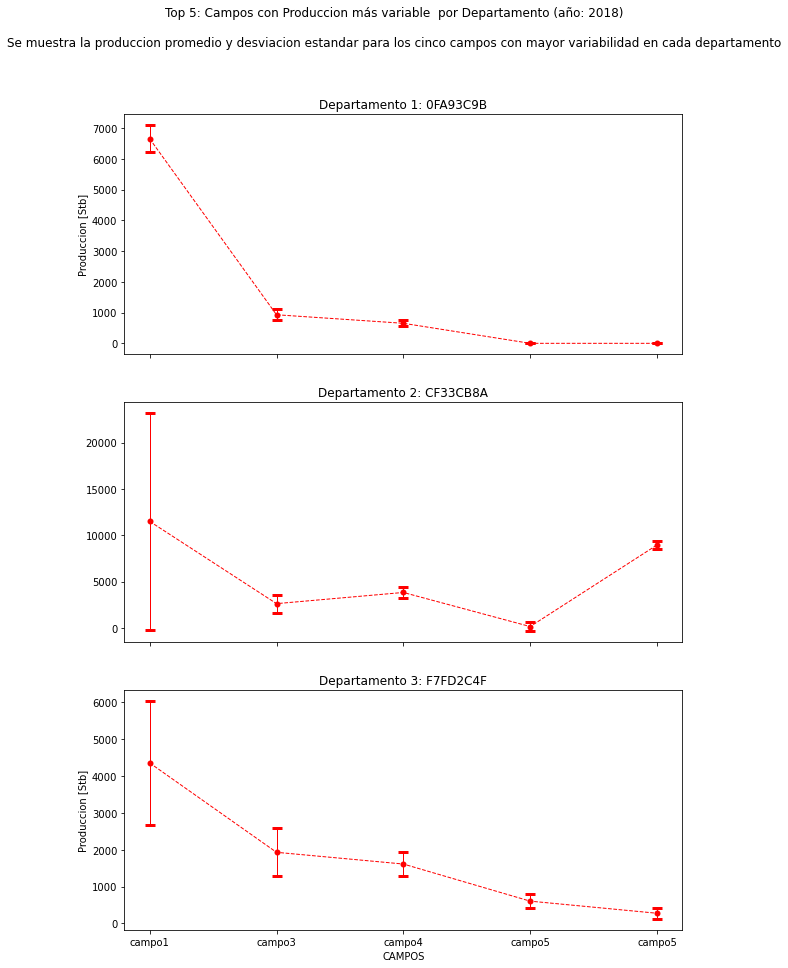

In [18]:
# ** Grafica - Pregunta 9 (2018) **

x = np.array([1, 2, 3, 4, 5])
x_labels = ['campo1','campo3','campo4','campo5','campo5'] # Top5: labels de campos genericos

# Departamento 1
dep1_std = dep_std_values[0,:] # Desv. estandard del Top 5-Campos en el Departamento 1
dep1_mean = dep_mean_values[0,:] # Produccion promedio del Top 5-Campos en el Departamento 1
dep1 = departamentos[0] # Nombre del Departamento 1

# Departamento 2
dep2_std = dep_std_values[1,:] 
dep2_mean = dep_mean_values[1,:]
dep2 = departamentos[1]

# Departamento 3
dep3_std = dep_std_values[2,:] 
dep3_mean = dep_mean_values[2,:]
dep3 = departamentos[2]

## Crear Grafica
fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True,figsize = (10,15))
fig.suptitle('Top 5: Campos con Produccion más variable  por Departamento (año: 2018)\n\nSe muestra la produccion promedio y desviacion estandar para los cinco campos con mayor variabilidad en cada departamento')
plt.setp(axs, xticks = x, xticklabels=x_labels)

# definir tipo de linea
linestyle = {"linestyle":"--", "linewidth":1, "markeredgewidth":3, "elinewidth":1, "capsize":5}

# Departamento 1
axs[0].errorbar(x, dep1_mean, dep1_std, color = 'r', marker='.',**linestyle)
axs[0].set_title('Departamento 1: '+str(dep1.upper()))
axs[0].set_ylabel('Produccion [Stb]')


# Departamento 2
axs[1].errorbar(x, dep2_mean, dep2_std, color = 'r', marker='.',**linestyle)
axs[1].set_title('Departamento 2: '+str(dep2.upper()))

# Departamento 3
axs[2].errorbar(x, dep3_mean, dep3_std, color = 'r', marker='.',**linestyle)
axs[2].set_title('Departamento 3: '+str(dep3.upper()))
axs[2].set_ylabel('Produccion [Stb]')
axs[2].set_xlabel('CAMPOS')

plt.show()

### Año 2017

In [19]:
## *** Produccion por Departamento (año 2017) ***

# Calcular indicadores estadisticos (mean, std, min, max) para cada campo en cada departamento (2017)
query9_17 = df_2017_2019_blind.loc[df_2017_2019_blind['año'] == 2017].drop('año',axis = 1).groupby(['departamento','campo']).describe() 

# Ordenar produccion en funcion de la desviacion estandar (std: medida de la variabilidad de la produccion)
# Para cada departamento, y para cada uno de los campos dentro de cada departamento
query9_17 = query9_17.sort_values(['departamento',('produccion','std')],ascending = [True,False])

# Imprimir: Datos de Produccion ordenados en funcion de 'STD'
produccion2017_departamento_ordenado = query9_17.drop([('produccion','count'),('produccion','25%'),('produccion','50%'),('produccion','75%')], axis = 1) # eliminar columnas de percentiles
print(produccion2017_departamento_ordenado) 


                          produccion                                         
                                mean           std          min           max
departamento campo                                                           
0fa93c9b     48670499    5131.886897   1365.422649  3273.185792   7167.209391
             373ebdec     888.391841    120.511270   728.999273   1077.757515
             e32e23a1     927.678493    103.085115   730.808086   1107.969390
5f559ecb     c6ba0174      14.576681     34.389305     0.000000    102.712629
cf33cb8a     2f614c0b   10137.735378  11106.260227     0.000000  23339.999720
             1f d2689f  11290.337821   2721.062767  3994.040924  14146.300572
             c728bf96    4109.033721   1290.006906   907.294892   5555.497397
             043b305e    3637.371850   1150.593406   186.762991   4386.088856
             febb6cf6    3309.968370    807.275086   780.763316   3727.612503
             3f10a1f5    1344.359926    455.447559   395.520797 

In [20]:
#  *** Obtener el Top 5 de Campos con mayor variabilidad para cada Departamento (2017) ***

top = 5 #top 5 

# Obtener nombre de los departamentos
departamentos = np.array(produccion2017_departamento_ordenado.index.get_level_values(0))
departamentos = np.unique(departamentos)
print('Nombre de los departamentos (2017): ',departamentos, '\n')
print('Numero de departamentos con produccion en 2017: ',len(departamentos), '\n')

# Obtener Produccion Promedio y Desv. Estandar 
## Inicializar dos matrices: para almacenar promedios y desviaciones para el top 5 de campos en cada departamento 
dep_std_values = np.zeros((len(departamentos),top))
dep_mean_values = np.zeros((len(departamentos),top))
i=0

# Iterar sobre cada departamento en el DataFrame: produccion2017_departamento_ordenado (valores promedio y desv. estandar)
for dep in departamentos:
    mean_values = produccion2017_departamento_ordenado.loc[produccion2017_departamento_ordenado.index.get_level_values('departamento') == dep,('produccion','mean')].values
    std_values = produccion2017_departamento_ordenado.loc[produccion2017_departamento_ordenado.index.get_level_values('departamento') == dep,('produccion','std')].values
    if (len(std_values) >= top): # Tomar el Top 5 de campos para el departamento
        dep_std_values[i,:] = std_values[0:top]
        dep_mean_values[i,:] = mean_values[0:top] 
    else: # rellenar con 0 si el departamento tiene menos de 5 campos 
        dep_std_values[i,:] = np.pad(std_values,(0,top-len(std_values)))
        dep_mean_values[i,:] = np.pad(mean_values,(0,top-len(std_values)))
    i += 1
    

Nombre de los departamentos (2017):  ['0fa93c9b' '5f559ecb' 'cf33cb8a' 'eccb9ef1' 'f7fd2c4f'] 

Numero de departamentos con produccion en 2017:  5 



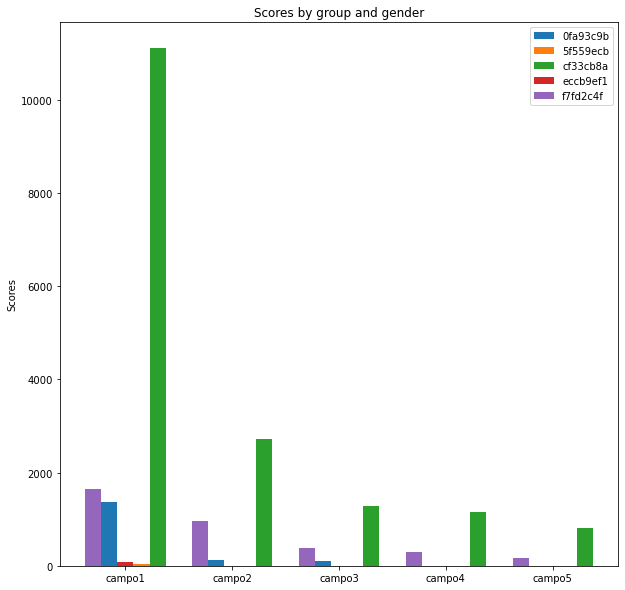

In [21]:
labels = ['campo1', 'campo2', 'campo3','campo4','campo5'] # labels genericos
dep1 = dep_std_values[0,:]
dep2 = dep_std_values[1,:]
dep3 = dep_std_values[2,:]
dep4 = dep_std_values[3,:]
dep5 = dep_std_values[4,:]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize = (10,10))

rects1 = ax.bar(x - width, dep1, width, label= departamentos[0])
rects2 = ax.bar(x + width, dep2, width, label=departamentos[1])
rects3 = ax.bar(x + 2*width, dep3, width, label=departamentos[2])
rects4 = ax.bar(x , dep4, width, label=departamentos[3])
rects5 = ax.bar(x - 2*width, dep5, width, label=departamentos[4])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

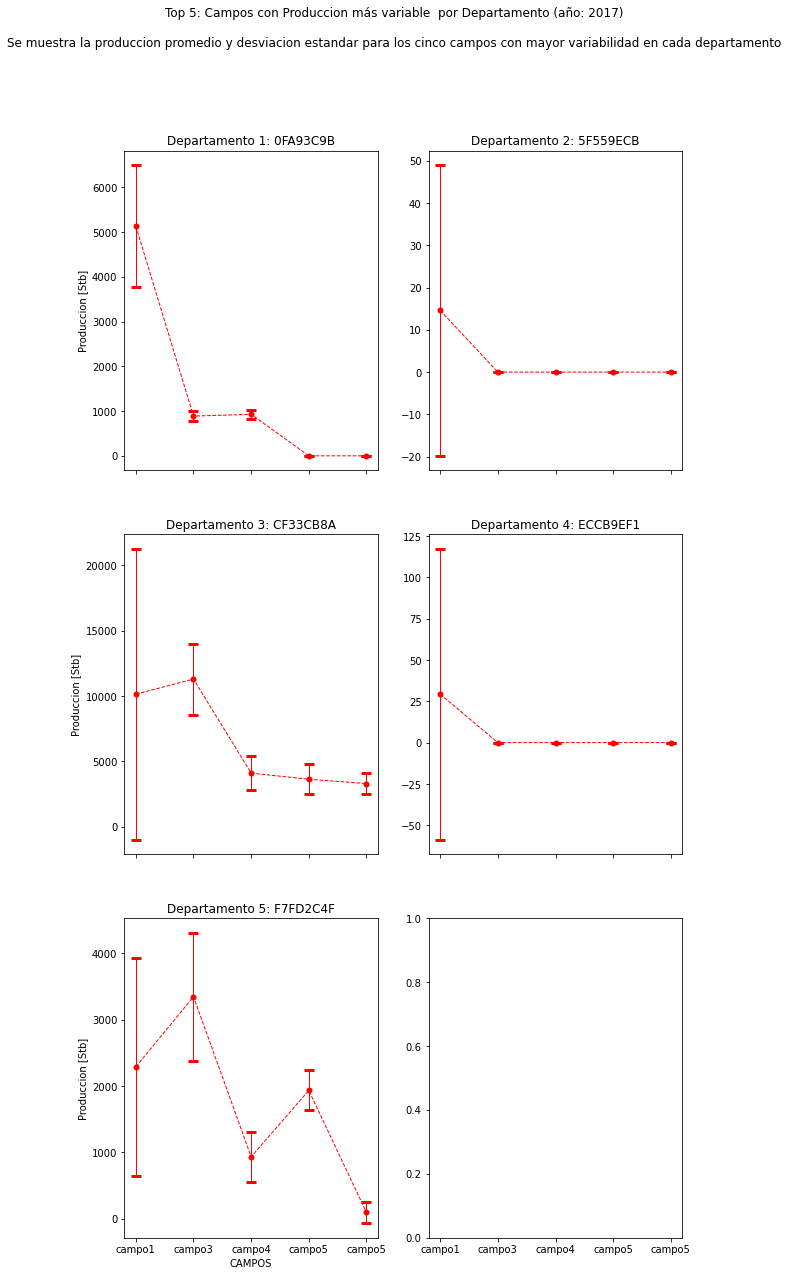

In [22]:
# ** Grafica - Pregunta 9 (2017) **

x = np.array([1, 2, 3, 4, 5])
x_labels = ['campo1','campo3','campo4','campo5','campo5'] # Top5: labels de campos genericos

# Departamento 1
dep1_std = dep_std_values[0,:] # Desv. estandard del Top 5-Campos en el Departamento 1
dep1_mean = dep_mean_values[0,:] # Produccion promedio del Top 5-Campos en el Departamento 1
dep1 = departamentos[0] # Nombre del Departamento 1

# Departamento 2
dep2_std = dep_std_values[1,:] 
dep2_mean = dep_mean_values[1,:]
dep2 = departamentos[1]

# Departamento 3
dep3_std = dep_std_values[2,:] 
dep3_mean = dep_mean_values[2,:]
dep3 = departamentos[2]

# Departamento 4
dep4_std = dep_std_values[3,:] 
dep4_mean = dep_mean_values[3,:]
dep4 = departamentos[3]

# Departamento 5
dep5_std = dep_std_values[4,:] 
dep5_mean = dep_mean_values[4,:]
dep5 = departamentos[4]

## Crear Grafica
fig, axs = plt.subplots(nrows=3, ncols=2, sharex=True,figsize = (10,20))
fig.suptitle('Top 5: Campos con Produccion más variable  por Departamento (año: 2017)\n\nSe muestra la produccion promedio y desviacion estandar para los cinco campos con mayor variabilidad en cada departamento')
plt.setp(axs, xticks = x, xticklabels=x_labels)

# definir tipo de linea
linestyle = {"linestyle":"--", "linewidth":1, "markeredgewidth":3, "elinewidth":1, "capsize":5}

# Departamento 1
axs[0,0].errorbar(x, dep1_mean, dep1_std, color = 'r', marker='.',**linestyle)
axs[0,0].set_title('Departamento 1: '+str(dep1.upper()))
axs[0,0].set_ylabel('Produccion [Stb]')


# Departamento 2
axs[0,1].errorbar(x, dep2_mean, dep2_std, color = 'r', marker='.',**linestyle)
axs[0,1].set_title('Departamento 2: '+str(dep2.upper()))

# Departamento 3
axs[1,0].errorbar(x, dep3_mean, dep3_std, color = 'r', marker='.',**linestyle)
axs[1,0].set_title('Departamento 3: '+str(dep3.upper()))
axs[1,0].set_ylabel('Produccion [Stb]')

# Departamento 4
axs[1,1].errorbar(x, dep4_mean, dep4_std, color = 'r', marker='.',**linestyle)
axs[1,1].set_title('Departamento 4: '+str(dep4.upper()))

# Departamento 5
axs[2,0].errorbar(x, dep5_mean, dep5_std, color = 'r', marker='.',**linestyle)
axs[2,0].set_title('Departamento 5: '+str(dep5.upper()))
axs[2,0].set_ylabel('Produccion [Stb]')
axs[2,0].set_xlabel('CAMPOS')

plt.show()



## Pregunta 10

In [23]:
# ** Filtrar produccion del campo "51CBB05D" en todos los datos disponibles: de 2017 a 2019 **

query10 = df_2017_2019_blind.groupby(['campo','mes','año'],as_index = False).sum() # Produccion de 2017 a 2019 (todos los campos)
query10 = query10[query10['campo'].isin(['51cbb05d'])].groupby(['mes','año'],as_index = False).sum().sort_values('año') # Produccion por mes para el campo "51CBB05D"
query10.sort_values('mes',inplace = True) # ordenar por mes
query10.head()

,mes,año,produccion
0,abr,2017,1017.901566
1,abr,2018,707.503393
2,abr,2019,582.869264
4,ago,2018,390.432523
3,ago,2017,836.364244


In [24]:
# ** Ordenar los datos en tiempo (desde enero 2017 --> diciembre 2019), y calcular el Caudal de produccion por mes **

meses_orden ={'ene':31,'feb':28,'mar':31,'abr':30,'may':31,'jun':30,'jul':31,'ago':31,'sep':30,'oct':31,'nov':30,'dic':31} # Meses - dias/mes
query10['mes'] = pd.Categorical(query10['mes'], meses_orden.keys())
query10.sort_values(['año','mes'],inplace = True) # ordenar por meses: de enero --> diciembre, y por años: 2017 --> 2019
query10.reset_index(drop = True, inplace = True)
query10['dias'] = query10['mes'].map(meses_orden) # anadir columna de dias en cada mes
query10['caudal'] = query10['produccion']/query10['dias'] #Calcular Caudal por mes

query10['mes_num'] = query10.index.values # anadir columna con meses enumerados
query10.head(15) #datos de produccion: desde enero 2017 --> diciembre 2019

,mes,año,produccion,dias,caudal,mes_num
0,ene,2017,1871.488651,31,60.370602,0
1,feb,2017,1412.303663,28,50.439417,1
2,mar,2017,1003.131949,31,32.359095,2
3,abr,2017,1017.901566,30,33.930052,3
4,may,2017,789.848893,31,25.478997,4
5,jun,2017,646.097985,30,21.536600,5
6,jul,2017,978.821890,31,31.574900,6
7,ago,2017,836.364244,31,26.979492,7
8,sep,2017,797.871564,30,26.595719,8
9,oct,2017,703.378049,31,22.689614,9


In [25]:
# Ordenar columnas: Mes, Caudal, Produccion (por mes)
datos_produccion = query10.drop(['dias','mes','año'], axis = 1) #eliminar columnas: dias, mes, año
datos_produccion = datos_produccion[['mes_num','caudal','produccion']] # ordenar columnas
datos_produccion.head(15)


,mes_num,caudal,produccion
0,0,60.370602,1871.488651
1,1,50.439417,1412.303663
2,2,32.359095,1003.131949
3,3,33.930052,1017.901566
4,4,25.478997,789.848893
5,5,21.536600,646.097985
6,6,31.574900,978.821890
7,7,26.979492,836.364244
8,8,26.595719,797.871564
9,9,22.689614,703.378049


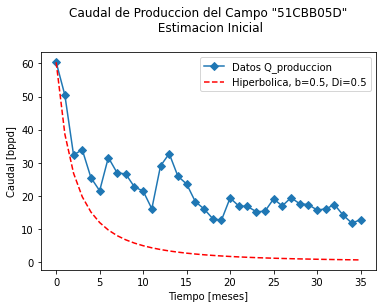

In [26]:
q0 = datos_produccion['caudal'].values[0] # valor inicial del Caudal de produccion
b = 0.5 #(Arps, hiperbolica, b = 0.5)

# Definir Funcion de Declinacion de Produccion (Arps, Hiperbolica, b = 0.5)
def hiperbolica(t,Di):
    return q0*((1 + b*Di*t)**(-1/b))

Di_0 = 0.5 # estimacion inicial de Di

n = len(datos_produccion['mes_num']) # numer de datos de produccion
y = np.empty(n) # vector y: almacenar datos estimados

# Calculo de Caudal - Hiperbolica (estimacion inicial de Di)
for i in range(n):
    y[i]  = hiperbolica(datos_produccion['mes_num'][i],Di_0)
    
# Grafica:
plt.plot(datos_produccion['mes_num'],datos_produccion['caudal'],marker = 'D') # Caudal (medicion) vs tiempo (meses)
plt.plot(datos_produccion['mes_num'],y,'r--') # Caudal calculado (Di inicial)
plt.legend(['Datos Q_produccion','Hiperbolica, b=0.5, Di=0.5'])
plt.xlabel('Tiempo [meses]')
plt.ylabel('Caudal [bppd]')
plt.title('Caudal de Produccion del Campo "51CBB05D"\n Estimacion Inicial\n')
plt.show()

In [27]:
# Calculo de la tasa de declinacion promedio del campo "51CBB05D" (Arps, hiberbolica, b=0.5)
from scipy.optimize import curve_fit

t = datos_produccion['mes_num'].values # valores de tiempo
caudal_datos = datos_produccion['caudal'].values # valores de Caudal de Produccion

# Regresion No Lineal: ARPS, Hiperbolica, b = 0.5
Di_techo, cov = curve_fit(hiperbolica,t,caudal_datos,Di_0)


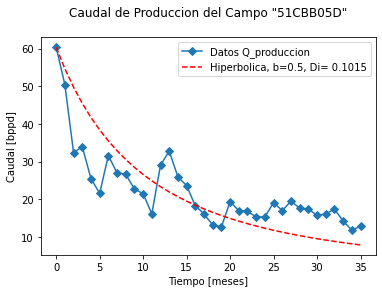

Tasa de declinacion promedio mensual Di =  0.1015 [1/mes]


In [28]:
# Calculo de Caudal de Produccion: Hiperbolica (b = 0.5, Di = 0.1015 [1/mes] )
for i in range(n):
    y[i]  = hiperbolica(datos_produccion['mes_num'][i], Di_techo)
    
# Grafica: Pregunta 10
plt.plot(datos_produccion['mes_num'],datos_produccion['caudal'], marker = 'D') # Caudal (medicion) vs tiempo (meses)
plt.plot(datos_produccion['mes_num'],y,'r--') # Caudal calculado: Hiperbolica (b = 0.5, Di = 0.1015 [1/mes] )

plt.legend(['Datos Q_produccion','Hiperbolica, b=0.5, Di= 0.1015'])
plt.xlabel('Tiempo [meses]')
plt.ylabel('Caudal [bppd]')
plt.title('Caudal de Produccion del Campo "51CBB05D"\n')
plt.show()
print('Tasa de declinacion promedio mensual Di = ', round(float(Di_techo),4),'[1/mes]')